
## <center> REGRESSION TASK - PARTICLE'S COORDINATES IN A SENSOR </center> 

#### Silva Bashllari & Baharak Qaderi

## <font color='green'> 1. LIBRARIES </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## <font color='green'> 2. DATA EXPLORATION  </font>

In [2]:
# Load the data
df = pd.read_csv('development.csv')
df.head(5)

,x,y,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,200.0,200.0,4.066907,-17.690173,2.847932,0.600000,2.007042,5.409161,-17.721210,4.538778,...,607.109118,-36.282996,583.899899,72.373094,0.374498,614.916861,-39.848523,591.852768,72.331028,0.405595
1,200.0,200.0,5.916801,-4.717111,5.792778,79.765174,1.564535,4.414289,-4.736827,3.720435,...,630.348007,-39.715988,580.042799,71.029155,0.403258,624.950701,-41.266681,586.569646,71.089058,0.405890
2,200.0,200.0,4.286652,-5.316132,2.356390,74.600000,1.404622,4.567191,-5.985437,3.490490,...,613.880342,-40.679678,580.407491,71.892264,0.568777,596.437125,-42.712286,574.091695,71.943934,0.498019
3,200.0,200.0,4.003635,-4.617459,2.189005,43.000000,1.512162,5.019058,-4.229949,6.786200,...,600.714957,-43.206601,579.882635,72.357388,0.255483,591.763739,-50.681940,584.099483,72.333282,0.336454
4,200.0,200.0,4.448146,-4.848743,3.997002,196.667482,1.101113,3.250262,-5.783587,2.449456,...,609.723785,-43.570892,590.156125,71.249130,0.413855,606.917023,-49.923819,584.316142,71.242904,0.293824


In [3]:
#get an understanding of the descriptive statistics in the dataframe
df.describe()

,x,y,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
count,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,...,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000
mean,397.723735,404.106355,4.866423,-5.046162,4.330495,97.593811,1.340462,16.510543,-9.187917,10.504198,...,608.650804,-42.152047,583.569358,71.628631,0.452944,609.060121,-46.921923,583.060292,71.695363,0.371027
std,120.593104,113.652228,1.481220,15.877804,3.489414,59.444364,0.342167,16.781018,29.955290,8.444105,...,13.723698,3.158175,6.646175,0.577619,0.299456,13.928735,3.478838,6.992203,0.585629,0.081983
min,200.000000,200.000000,1.394440,-7741.109923,-0.582573,0.000000,0.275854,2.028134,-9930.114637,-0.997301,...,451.502789,-51.840704,516.386725,70.420683,0.129428,456.816620,-57.876959,513.760083,70.423425,0.102138
25%,285.000000,310.000000,4.123941,-5.257178,2.383830,46.400000,1.096611,5.619728,-8.114323,4.755876,...,598.888989,-44.601152,579.190080,71.144733,0.342264,599.390156,-49.596344,578.269642,71.200245,0.321753
50%,400.000000,405.000000,4.668321,-4.646420,3.361071,90.600000,1.316209,10.068513,-5.229009,7.886552,...,607.190645,-42.360754,583.512671,71.627565,0.400117,607.202368,-47.147636,583.401620,71.681603,0.366981
75%,500.000000,500.000000,5.265888,-4.093211,5.104368,151.026985,1.557156,19.031319,-4.387686,12.945553,...,616.837596,-39.833169,587.982952,72.134776,0.466077,617.313303,-44.375652,587.877953,72.194196,0.415578
max,600.000000,600.000000,20.515415,-0.745816,149.589043,204.600000,6.088277,106.649066,-1.054508,152.517700,...,665.267443,-29.085419,614.884980,72.856918,5.031400,675.052221,-29.592059,619.099952,73.031394,4.925181


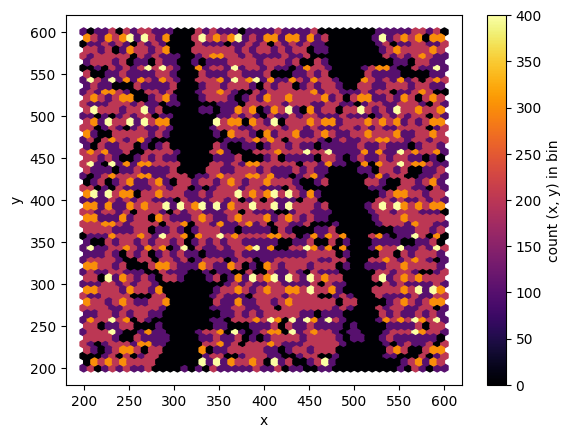

In [4]:
# Hexbin plotof x and y variables
plt.hexbin(df['x'], df['y'], gridsize=50, cmap='inferno')
plt.colorbar(label='count (x, y) in bin')
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('hexbin.png', dpi=300)
plt.show()

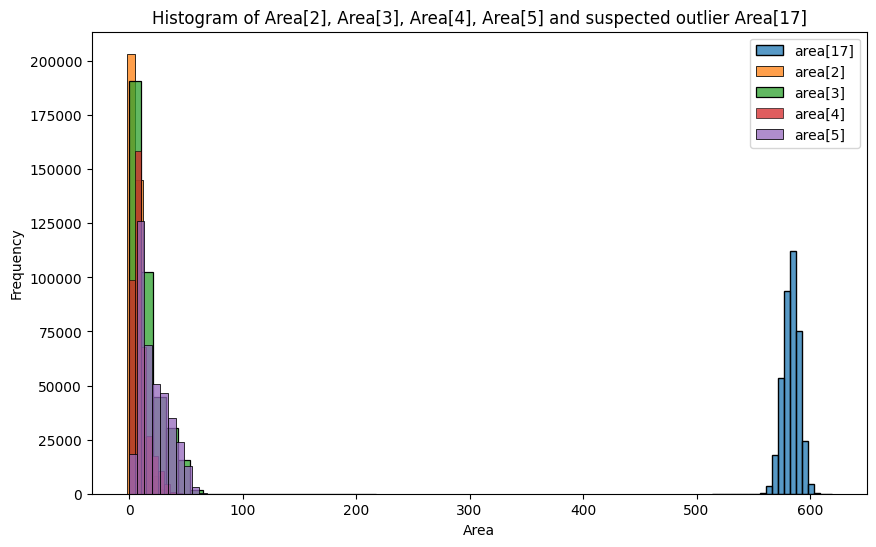

In [5]:
# plotting the 'area' feature coming from different sensors as exemplary:
plt.figure(figsize=(10, 6))

sns.histplot(df['area[17]'], bins=20, kde=False, label='area[17]')

sns.histplot(df['area[2]'], bins=20, kde=False, label='area[2]')
sns.histplot(df['area[3]'], bins=20, kde=False, label='area[3]')
sns.histplot(df['area[4]'], bins=20, kde=False, label='area[4]')
sns.histplot(df['area[5]'], bins=20, kde=False, label='area[5]')


plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Histogram of Area[2], Area[3], Area[4], Area[5] and suspected outlier Area[17]')
plt.legend()
#plt.savefig('areao.png', dpi=300)
plt.show()

/var/folders/_z/xgpr8kxd32z91kd1v5vr7xlh0000gn/T/ipykernel_1048/2414472366.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_log = df[columns_pmax_trf].applymap(lambda x: np.log(x) if x > 0 else np.nan)


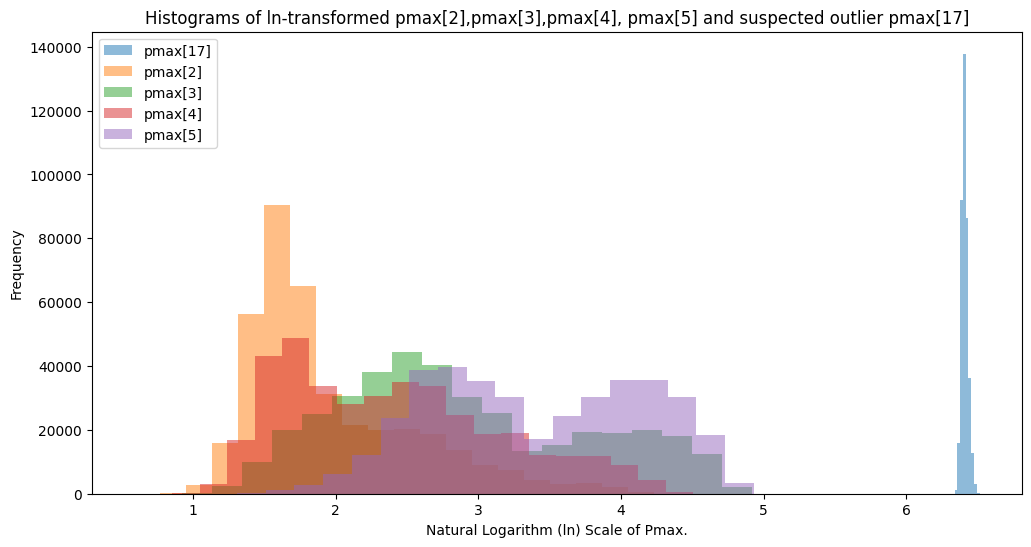

In [6]:
#plotting a subset of the logarithm transformed of the pmax features 
columns_pmax_trf = ['pmax[17]', 'pmax[2]', 'pmax[3]', 'pmax[4]', 'pmax[5]']


df_log = df[columns_pmax_trf].applymap(lambda x: np.log(x) if x > 0 else np.nan)

# Plotting histograms
plt.figure(figsize=(12, 6))

for column in columns_pmax_trf:
    plt.hist(df_log[column], bins=20, alpha=0.5, label=column)

plt.xlabel('Natural Logarithm (ln) Scale of Pmax.')
plt.ylabel('Frequency')
plt.title('Histograms of ln-transformed pmax[2],pmax[3],pmax[4], pmax[5] and suspected outlier pmax[17]')
plt.legend()
#plt.savefig('pmax.png', dpi=300)
plt.show()

In [7]:
#The suspected outliers removal:
numbers_to_remove = [int(col.split('[')[1][:-1]) for col in df.columns if '[' in col and ']' in col]
numbers_to_remove = [col for col in numbers_to_remove if col in [0, 7, 12, 15, 16, 17]]

columns_to_remove = [f"{feature}[{number}]" for feature in ['pmax', 'negpmax', 'area', 'tmax', 'rms'] for number in numbers_to_remove]
print(columns_to_remove)

['pmax[0]', 'pmax[0]', 'pmax[0]', 'pmax[0]', 'pmax[0]', 'pmax[7]', 'pmax[7]', 'pmax[7]', 'pmax[7]', 'pmax[7]', 'pmax[12]', 'pmax[12]', 'pmax[12]', 'pmax[12]', 'pmax[12]', 'pmax[15]', 'pmax[15]', 'pmax[15]', 'pmax[15]', 'pmax[15]', 'pmax[16]', 'pmax[16]', 'pmax[16]', 'pmax[16]', 'pmax[16]', 'pmax[17]', 'pmax[17]', 'pmax[17]', 'pmax[17]', 'pmax[17]', 'negpmax[0]', 'negpmax[0]', 'negpmax[0]', 'negpmax[0]', 'negpmax[0]', 'negpmax[7]', 'negpmax[7]', 'negpmax[7]', 'negpmax[7]', 'negpmax[7]', 'negpmax[12]', 'negpmax[12]', 'negpmax[12]', 'negpmax[12]', 'negpmax[12]', 'negpmax[15]', 'negpmax[15]', 'negpmax[15]', 'negpmax[15]', 'negpmax[15]', 'negpmax[16]', 'negpmax[16]', 'negpmax[16]', 'negpmax[16]', 'negpmax[16]', 'negpmax[17]', 'negpmax[17]', 'negpmax[17]', 'negpmax[17]', 'negpmax[17]', 'area[0]', 'area[0]', 'area[0]', 'area[0]', 'area[0]', 'area[7]', 'area[7]', 'area[7]', 'area[7]', 'area[7]', 'area[12]', 'area[12]', 'area[12]', 'area[12]', 'area[12]', 'area[15]', 'area[15]', 'area[15]', 'ar

In [8]:
#creating a new dataframe without the suspected outliers: 
df_nn = df.drop(columns=columns_to_remove)
df_nn.head()

,x,y,pmax[1],negpmax[1],area[1],tmax[1],rms[1],pmax[2],negpmax[2],area[2],...,pmax[13],negpmax[13],area[13],tmax[13],rms[13],pmax[14],negpmax[14],area[14],tmax[14],rms[14]
0,200.0,200.0,5.409161,-17.721210,4.538778,22.600000,1.563902,6.084506,-19.892543,3.132328,...,7.454877,-16.861163,4.191909,72.600000,1.184943,6.611877,-17.685799,4.884680,162.800000,1.284969
1,200.0,200.0,4.414289,-4.736827,3.720435,111.875058,1.228058,4.507257,-3.787175,3.267461,...,18.472514,-3.372324,16.620582,119.812512,1.578009,13.802252,-5.154840,8.758870,120.000000,1.093953
2,200.0,200.0,4.567191,-5.985437,3.490490,107.800000,1.015408,5.384155,-3.948853,2.929150,...,7.336668,-5.742383,11.792258,71.908212,1.333036,5.940039,-3.860550,5.340140,6.614830,1.183951
3,200.0,200.0,5.019058,-4.229949,6.786200,175.600000,1.350620,4.165598,-5.576041,1.544370,...,8.450671,-6.342114,4.496741,72.600000,1.945065,6.434910,-5.576315,15.789638,72.195420,1.738998
4,200.0,200.0,3.250262,-5.783587,2.449456,159.800000,0.759515,4.736023,-5.137939,4.211047,...,8.721952,-4.396436,9.127136,71.411535,1.513988,4.483080,-5.361823,3.366542,160.185705,1.323621


In [9]:
#create the development set without x and y:
dev_nn= df_nn.drop(['x', 'y'],axis=1)
dev_nn.head()

,pmax[1],negpmax[1],area[1],tmax[1],rms[1],pmax[2],negpmax[2],area[2],tmax[2],rms[2],...,pmax[13],negpmax[13],area[13],tmax[13],rms[13],pmax[14],negpmax[14],area[14],tmax[14],rms[14]
0,5.409161,-17.721210,4.538778,22.600000,1.563902,6.084506,-19.892543,3.132328,72.2,1.456865,...,7.454877,-16.861163,4.191909,72.600000,1.184943,6.611877,-17.685799,4.884680,162.800000,1.284969
1,4.414289,-4.736827,3.720435,111.875058,1.228058,4.507257,-3.787175,3.267461,55.0,1.709002,...,18.472514,-3.372324,16.620582,119.812512,1.578009,13.802252,-5.154840,8.758870,120.000000,1.093953
2,4.567191,-5.985437,3.490490,107.800000,1.015408,5.384155,-3.948853,2.929150,28.0,1.373336,...,7.336668,-5.742383,11.792258,71.908212,1.333036,5.940039,-3.860550,5.340140,6.614830,1.183951
3,5.019058,-4.229949,6.786200,175.600000,1.350620,4.165598,-5.576041,1.544370,14.0,1.115078,...,8.450671,-6.342114,4.496741,72.600000,1.945065,6.434910,-5.576315,15.789638,72.195420,1.738998
4,3.250262,-5.783587,2.449456,159.800000,0.759515,4.736023,-5.137939,4.211047,71.2,1.237268,...,8.721952,-4.396436,9.127136,71.411535,1.513988,4.483080,-5.361823,3.366542,160.185705,1.323621


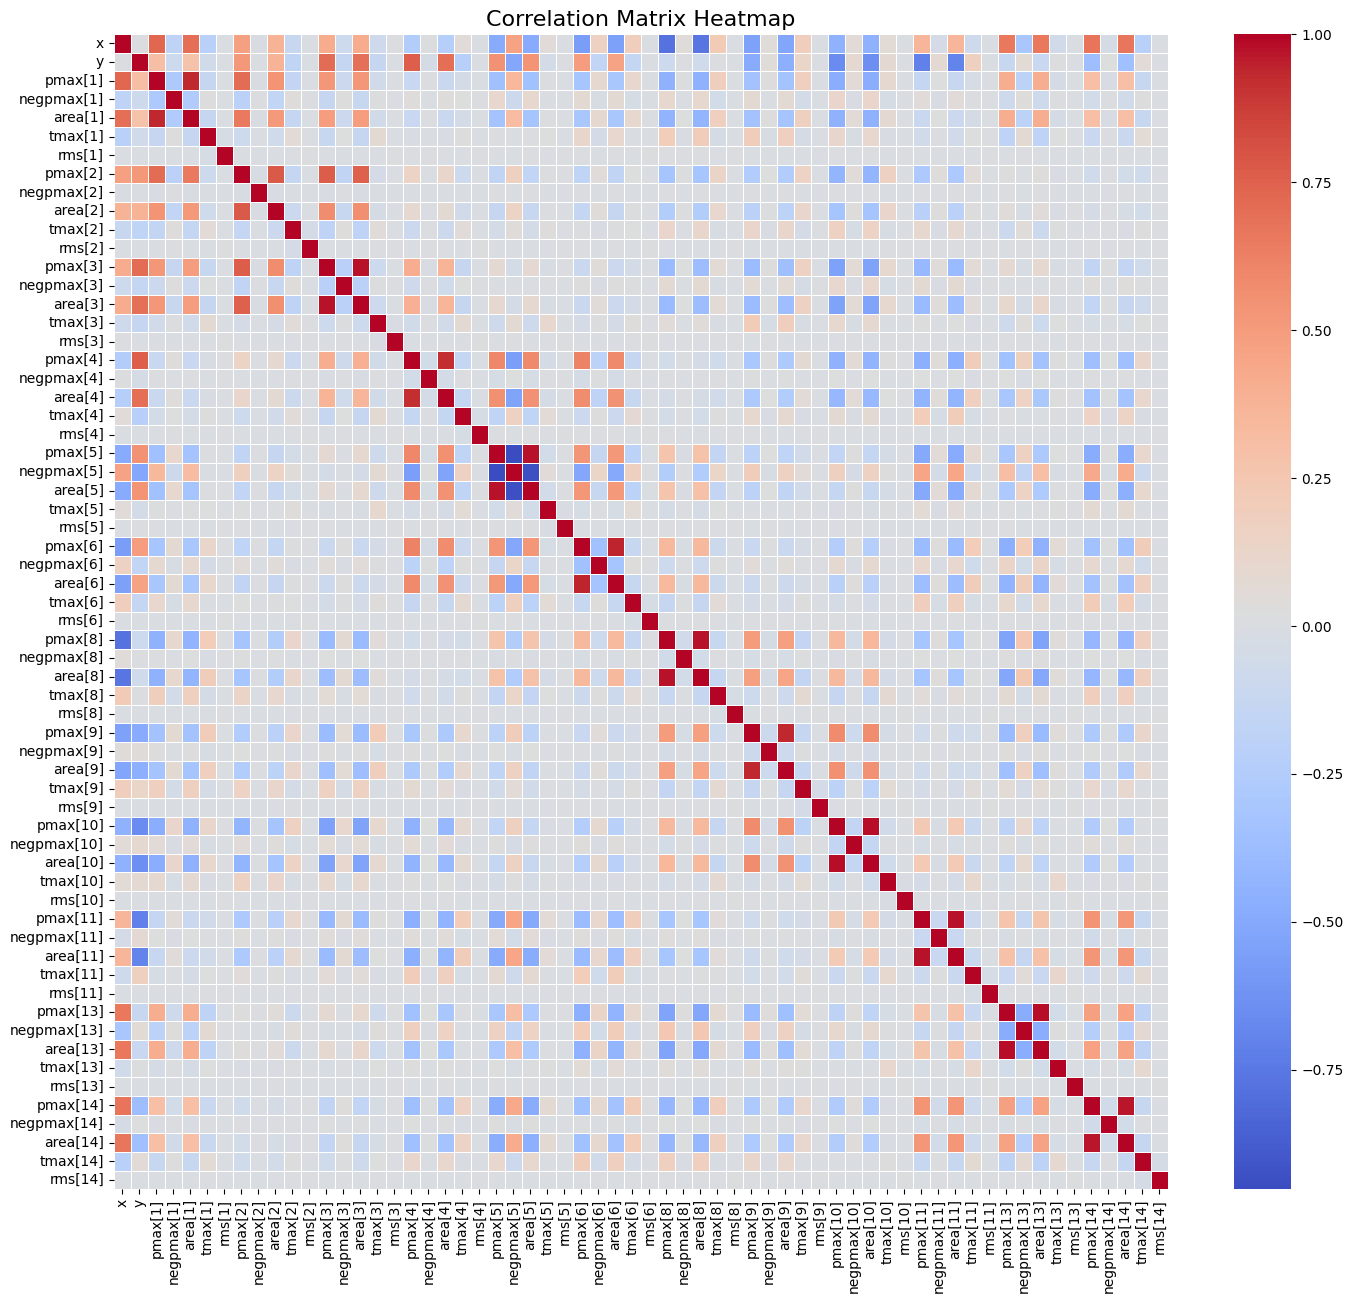

In [10]:
# creating and visualizing the correlation matrix on the new dataframe:
correlation_matrix = df_nn.corr()

plt.figure(figsize=(17, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
#plt.savefig('correlation_matrix_heatmap.png', dpi=300)
plt.show()

In [11]:
#save x & y in separate columns: 
xy = df[['x', 'y']].copy()
xy.head()

,x,y
0,200.0,200.0
1,200.0,200.0
2,200.0,200.0
3,200.0,200.0
4,200.0,200.0


In [12]:
#create the development set without x and y:
dev= df.drop(['x', 'y'],axis=1)
dev.head()

,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],tmax[1],rms[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,4.066907,-17.690173,2.847932,0.600000,2.007042,5.409161,-17.721210,4.538778,22.600000,1.563902,...,607.109118,-36.282996,583.899899,72.373094,0.374498,614.916861,-39.848523,591.852768,72.331028,0.405595
1,5.916801,-4.717111,5.792778,79.765174,1.564535,4.414289,-4.736827,3.720435,111.875058,1.228058,...,630.348007,-39.715988,580.042799,71.029155,0.403258,624.950701,-41.266681,586.569646,71.089058,0.405890
2,4.286652,-5.316132,2.356390,74.600000,1.404622,4.567191,-5.985437,3.490490,107.800000,1.015408,...,613.880342,-40.679678,580.407491,71.892264,0.568777,596.437125,-42.712286,574.091695,71.943934,0.498019
3,4.003635,-4.617459,2.189005,43.000000,1.512162,5.019058,-4.229949,6.786200,175.600000,1.350620,...,600.714957,-43.206601,579.882635,72.357388,0.255483,591.763739,-50.681940,584.099483,72.333282,0.336454
4,4.448146,-4.848743,3.997002,196.667482,1.101113,3.250262,-5.783587,2.449456,159.800000,0.759515,...,609.723785,-43.570892,590.156125,71.249130,0.413855,606.917023,-49.923819,584.316142,71.242904,0.293824


In [13]:
#creating the PCA with all the 90 features to gain a wholistic understanding: 
pca = PCA(n_components=90)
pca.fit(dev)
dev_pca = pca.transform(dev)

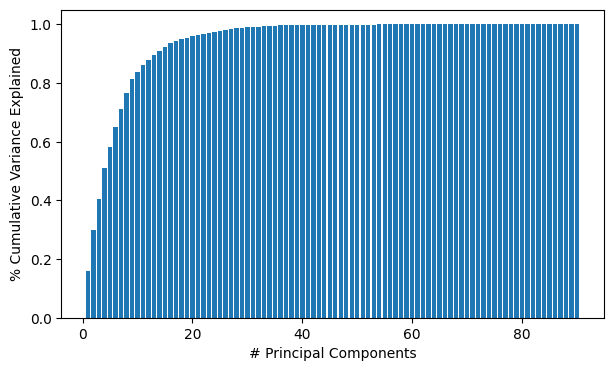

In [14]:
#visualize how many components actually explain how much of the variance in the set
cum_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_var.append(var_exp)
    
fig, ax = plt.subplots(figsize=(7,4))
ax.bar(range(1,91), cum_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');

In [15]:
#making a dataset only with 30 principal components
for i in range(30):
    
    pca_30 = dev_pca[:,0:i+1]

In [16]:
pca_30

array([[  4.21540204, -14.37778836,  -7.39391481, ..., -24.84486048,
        -16.39017764,  -7.64142171],
       [  0.27447328,   1.85459108,   4.74127336, ..., -30.080447  ,
         17.4830832 ,   8.2161701 ],
       [  0.05590703,   1.61248619,   6.17169691, ..., -42.44954611,
        -11.34167212, -28.59391381],
       ...,
       [ -9.06670232, -30.38977573,   5.99512123, ...,  -3.15699313,
         -9.69885346,  10.86041866],
       [ -8.32605179, -28.00548168,   4.68759607, ..., -21.92852121,
        -11.37809078,   5.47152545],
       [  6.02656316, -26.63641514, -10.47148512, ...,  -6.90146004,
         -9.07149183,   1.6047527 ]])

## <font color='green'> 3. VANILLA LINEAR MODELS EXPERIMENTS: MULTIPLE REGRESSION, LASSO, RIDGE.  </font>

#### 3.1 EXPERIMENTS WITH THE ENTIRE DATASET WITH 90 FEATURES

In [17]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(dev, xy, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set - Features:",X_train0.shape, "Labels:",y_train0.shape)
print("Testing set - Features:",  X_test0.shape, "Labels:",  y_test0.shape)

Training set - Features: (308400, 90) Labels: (308400, 2)
Testing set - Features: (77100, 90) Labels: (77100, 2)


In [18]:
# Linear regression with all 90 features
"""
model0 = MultiOutputRegressor(LinearRegression())
model0.fit(X_train0, y_train0)
pred0 =model0.predict(X_test0)
"""

'\nmodel0 = MultiOutputRegressor(LinearRegression())\nmodel0.fit(X_train0, y_train0)\npred0 =model0.predict(X_test0)\n'

In [19]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(dev, xy, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set - Features:",X_train1.shape, "Labels:",y_train1.shape)
print("Testing set - Features:",  X_test1.shape, "Labels:",  y_test1.shape)

Training set - Features: (308400, 90) Labels: (308400, 2)
Testing set - Features: (77100, 90) Labels: (77100, 2)


In [20]:
# Lasso regression with all 90 features
"""
model1 =  MultiOutputRegressor(Lasso(alpha=0.01, max_iter=1000)) 
model1.fit(X_train1, y_train1)
pred1 =model1.predict(X_test1)
"""

'\nmodel1 =  MultiOutputRegressor(Lasso(alpha=0.01, max_iter=1000)) \nmodel1.fit(X_train1, y_train1)\npred1 =model1.predict(X_test1)\n'

In [21]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(dev, xy, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set - Features:",X_train2.shape, "Labels:",y_train2.shape)
print("Testing set - Features:",  X_test2.shape, "Labels:",  y_test2.shape)

Training set - Features: (308400, 90) Labels: (308400, 2)
Testing set - Features: (77100, 90) Labels: (77100, 2)


In [22]:
# Ridge regression with all 90 features
"""
model2 = MultiOutputRegressor(Ridge(alpha=0.01, max_iter=1000)) 
model2.fit(X_train2, y_train2)
pred2 =model2.predict(X_test2)
"""

'\nmodel2 = MultiOutputRegressor(Ridge(alpha=0.01, max_iter=1000)) \nmodel2.fit(X_train2, y_train2)\npred2 =model2.predict(X_test2)\n'

#### 3.2 EXPERIMENTS WITH 60 FEATURES ( - 30 SUSPECTED AS OUTLIER ONES)

In [23]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(dev_nn, xy, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set - Features:",X_train3.shape, "Labels:",y_train3.shape)
print("Testing set - Features:",  X_test3.shape, "Labels:",  y_test3.shape)

Training set - Features: (308400, 60) Labels: (308400, 2)
Testing set - Features: (77100, 60) Labels: (77100, 2)


In [24]:
# Linear regression with all 60 features
"""
model3 = MultiOutputRegressor(LinearRegression())
model3.fit(X_train3, y_train3)
pred3 =model3.predict(X_test3)
"""

'\nmodel3 = MultiOutputRegressor(LinearRegression())\nmodel3.fit(X_train3, y_train3)\npred3 =model3.predict(X_test3)\n'

In [25]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(dev_nn, xy, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set - Features:",X_train4.shape, "Labels:",y_train4.shape)
print("Testing set - Features:",  X_test4.shape, "Labels:",  y_test4.shape)

Training set - Features: (308400, 60) Labels: (308400, 2)
Testing set - Features: (77100, 60) Labels: (77100, 2)


In [26]:
# Lasso regression with 60 features
"""
model4 =  MultiOutputRegressor(Lasso(alpha=0.01, max_iter=1000)) 
model4.fit(X_train4, y_train4)
pred4 =model4.predict(X_test4)
"""

'\nmodel4 =  MultiOutputRegressor(Lasso(alpha=0.01, max_iter=1000)) \nmodel4.fit(X_train4, y_train4)\npred4 =model4.predict(X_test4)\n'

In [27]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(dev_nn, xy, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set - Features:",X_train5.shape, "Labels:",y_train5.shape)
print("Testing set - Features:",  X_test5.shape, "Labels:",  y_test5.shape)

Training set - Features: (308400, 60) Labels: (308400, 2)
Testing set - Features: (77100, 60) Labels: (77100, 2)


In [28]:
# Ridge regression with all 90 features
"""
model5 = MultiOutputRegressor(Ridge(alpha=0.01, max_iter=1000)) 
model5.fit(X_train5, y_train5)
pred5 =model5.predict(X_test5)
"""

'\nmodel5 = MultiOutputRegressor(Ridge(alpha=0.01, max_iter=1000)) \nmodel5.fit(X_train5, y_train5)\npred5 =model5.predict(X_test5)\n'

## <font color='green'> 4. DATA PREPROCESSING AND THEN FITTING TO LINEAR MODELS </font>

#### 4.0 Training models with 30 principal components of PCA without prior transformation

In [29]:
pca_30

array([[  4.21540204, -14.37778836,  -7.39391481, ..., -24.84486048,
        -16.39017764,  -7.64142171],
       [  0.27447328,   1.85459108,   4.74127336, ..., -30.080447  ,
         17.4830832 ,   8.2161701 ],
       [  0.05590703,   1.61248619,   6.17169691, ..., -42.44954611,
        -11.34167212, -28.59391381],
       ...,
       [ -9.06670232, -30.38977573,   5.99512123, ...,  -3.15699313,
         -9.69885346,  10.86041866],
       [ -8.32605179, -28.00548168,   4.68759607, ..., -21.92852121,
        -11.37809078,   5.47152545],
       [  6.02656316, -26.63641514, -10.47148512, ...,  -6.90146004,
         -9.07149183,   1.6047527 ]])

In [30]:
X_train_pc0, X_test_pc0, y_train_pc0, y_test_pc0 = train_test_split(pca_30, xy, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set - Features:",X_train_pc0.shape, "Labels:",y_train_pc0.shape)
print("Testing set - Features:",  X_test_pc0.shape, "Labels:",  y_test_pc0.shape)

Training set - Features: (308400, 30) Labels: (308400, 2)
Testing set - Features: (77100, 30) Labels: (77100, 2)


In [31]:
# Linear regression with 30 principal components
"""
model6 = MultiOutputRegressor(LinearRegression())
model6.fit(X_train_pc0, y_train_pc0)
pred6 =model6.predict(X_test_pc0)
"""

'\nmodel6 = MultiOutputRegressor(LinearRegression())\nmodel6.fit(X_train_pc0, y_train_pc0)\npred6 =model6.predict(X_test_pc0)\n'

In [32]:
X_train_pc1, X_test_pc1, y_train_pc1, y_test_pc1 = train_test_split(pca_30, xy, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set - Features:",X_train_pc1.shape, "Labels:",y_train_pc1.shape)
print("Testing set - Features:",  X_test_pc1.shape, "Labels:",  y_test_pc1.shape)

Training set - Features: (308400, 30) Labels: (308400, 2)
Testing set - Features: (77100, 30) Labels: (77100, 2)


In [33]:
# Lasso regression  with 30 principal components
"""
model7 =  MultiOutputRegressor(Lasso(alpha=0.01, max_iter=1000)) 
model7.fit(X_train_pc1, y_train_pc1)
pred7 =model7.predict(X_test_pc1)
"""

'\nmodel7 =  MultiOutputRegressor(Lasso(alpha=0.01, max_iter=1000)) \nmodel7.fit(X_train_pc1, y_train_pc1)\npred7 =model7.predict(X_test_pc1)\n'

In [34]:
X_train_pc2, X_test_pc2, y_train_pc2, y_test_pc2 = train_test_split(pca_30, xy, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set - Features:",X_train_pc2.shape, "Labels:",y_train_pc2.shape)
print("Testing set - Features:",  X_test_pc2.shape, "Labels:",  y_test_pc2.shape)

Training set - Features: (308400, 30) Labels: (308400, 2)
Testing set - Features: (77100, 30) Labels: (77100, 2)


In [35]:
# Ridge regression with 30 principal components
"""
model8 = MultiOutputRegressor(Ridge(alpha=0.01, max_iter=1000)) 
model8.fit(X_train_pc2, y_train_pc2)
pred8 =model8.predict(X_test_pc2)
"""

'\nmodel8 = MultiOutputRegressor(Ridge(alpha=0.01, max_iter=1000)) \nmodel8.fit(X_train_pc2, y_train_pc2)\npred8 =model8.predict(X_test_pc2)\n'

#### 4.1 Standard Scaling the data - Building the PCA - Feeding to Linear Models.

In [36]:
scaler1 = StandardScaler()
dev_sd = scaler1.fit_transform(dev)
dev_sd

array([[-5.39769181e-01, -7.96333489e-01, -4.24875071e-01, ...,
         1.25747022e+00,  1.08543925e+00,  4.21652692e-01],
       [ 7.09130848e-01,  2.07239798e-02,  4.19063236e-01, ...,
         5.01895911e-01, -1.03530728e+00,  4.25256031e-01],
       [-3.91415051e-01, -1.70029551e-02, -5.65741820e-01, ...,
        -1.28265848e+00,  4.24451023e-01,  1.54901397e+00],
       ...,
       [-4.20510502e-01, -4.75695761e-02, -3.24127626e-01, ...,
         8.72812982e-01, -2.14655033e-01, -8.46417666e-01],
       [ 6.53922563e+00,  1.82044649e-03,  5.83645895e-01, ...,
         6.94589076e-01, -3.91128106e-01,  4.53944620e-01],
       [-4.47671606e-01, -1.05438509e+00, -3.12034847e-01, ...,
        -6.92415968e-02,  5.47242781e-01, -2.06341839e-01]])

In [37]:
#creating the PCA with all the 90 features to gain a wholistic understanding: 
pca_sd = PCA(n_components=90)
pca_sd.fit(dev_sd)
dev_pca_sd = pca.transform(dev_sd)

/Users/baharakqaderi/anaconda3/envs/mypy/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


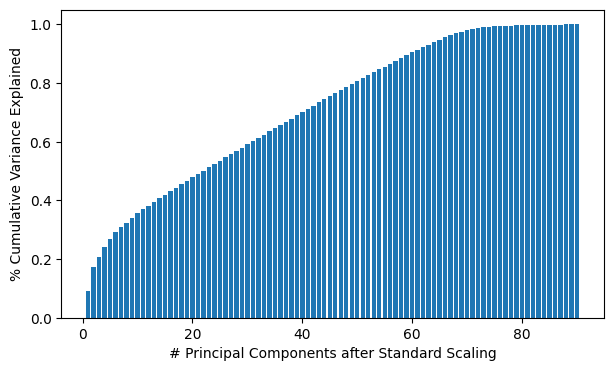

In [38]:
#visualize how many components actually explain how much of the variance in the set
cum_var = []
var_exp = 0
for i in pca_sd.explained_variance_ratio_:
    var_exp += i
    cum_var.append(var_exp)
    
fig, ax = plt.subplots(figsize=(7,4))
ax.bar(range(1,91), cum_var)
ax.set_xlabel('# Principal Components after Standard Scaling')
ax.set_ylabel('% Cumulative Variance Explained');

In [39]:
#making a dataset only with 30 principal components
for i in range(70):
    
    pca_70 = dev_pca_sd[:,0:i+1]

In [40]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(pca_70, xy, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set - Features:",X_train_s.shape, "Labels:",y_train_s.shape)
print("Testing set - Features:",  X_test_s.shape, "Labels:",  y_test_s.shape)

Training set - Features: (308400, 70) Labels: (308400, 2)
Testing set - Features: (77100, 70) Labels: (77100, 2)


In [41]:
# Linear regression with 70 principal components of the standard scaled pca
"""
models = MultiOutputRegressor(LinearRegression())
models.fit(X_train_s, y_train_s)
preds =models.predict(X_test_s)
"""

'\nmodels = MultiOutputRegressor(LinearRegression())\nmodels.fit(X_train_s, y_train_s)\npreds =models.predict(X_test_s)\n'

In [42]:
X_train_s1, X_test_s1, y_train_s1, y_test_s1 = train_test_split(pca_70, xy, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set - Features:",X_train_s1.shape, "Labels:",y_train_s1.shape)
print("Testing set - Features:",  X_test_s1.shape, "Labels:",  y_test_s1.shape)

Training set - Features: (308400, 70) Labels: (308400, 2)
Testing set - Features: (77100, 70) Labels: (77100, 2)


In [43]:
# Lasso Regression with 70 principal components of the standard scaled pca
"""
models1 =  MultiOutputRegressor(Lasso(alpha=0.01, max_iter=1000)) 
models1.fit(X_train_s1, y_train_s1)
preds1 =models1.predict(X_test_s1)
"""

'\nmodels1 =  MultiOutputRegressor(Lasso(alpha=0.01, max_iter=1000)) \nmodels1.fit(X_train_s1, y_train_s1)\npreds1 =models1.predict(X_test_s1)\n'

In [44]:
X_train_s2, X_test_s2, y_train_s2, y_test_s2 = train_test_split(pca_70, xy, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set - Features:",X_train_s2.shape, "Labels:",y_train_s2.shape)
print("Testing set - Features:",  X_test_s2.shape, "Labels:",  y_test_s2.shape)

Training set - Features: (308400, 70) Labels: (308400, 2)
Testing set - Features: (77100, 70) Labels: (77100, 2)


In [45]:
# Ridge Regression with 70 principal components of the standard scaled pca
"""
models2 = MultiOutputRegressor(Ridge(alpha=0.01, max_iter=1000)) 
models2.fit(X_train_s2, y_train_s2)
preds2 =models2.predict(X_test_s2)
"""

'\nmodels2 = MultiOutputRegressor(Ridge(alpha=0.01, max_iter=1000)) \nmodels2.fit(X_train_s2, y_train_s2)\npreds2 =models2.predict(X_test_s2)\n'

## <font color='green'> 5. TREE BASED MODELS: DECISION TREE AND RANDOM FOREST  </font>

In [46]:
dev.head()

,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],tmax[1],rms[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,4.066907,-17.690173,2.847932,0.600000,2.007042,5.409161,-17.721210,4.538778,22.600000,1.563902,...,607.109118,-36.282996,583.899899,72.373094,0.374498,614.916861,-39.848523,591.852768,72.331028,0.405595
1,5.916801,-4.717111,5.792778,79.765174,1.564535,4.414289,-4.736827,3.720435,111.875058,1.228058,...,630.348007,-39.715988,580.042799,71.029155,0.403258,624.950701,-41.266681,586.569646,71.089058,0.405890
2,4.286652,-5.316132,2.356390,74.600000,1.404622,4.567191,-5.985437,3.490490,107.800000,1.015408,...,613.880342,-40.679678,580.407491,71.892264,0.568777,596.437125,-42.712286,574.091695,71.943934,0.498019
3,4.003635,-4.617459,2.189005,43.000000,1.512162,5.019058,-4.229949,6.786200,175.600000,1.350620,...,600.714957,-43.206601,579.882635,72.357388,0.255483,591.763739,-50.681940,584.099483,72.333282,0.336454
4,4.448146,-4.848743,3.997002,196.667482,1.101113,3.250262,-5.783587,2.449456,159.800000,0.759515,...,609.723785,-43.570892,590.156125,71.249130,0.413855,606.917023,-49.923819,584.316142,71.242904,0.293824


In [47]:
dev_nn.head()

,pmax[1],negpmax[1],area[1],tmax[1],rms[1],pmax[2],negpmax[2],area[2],tmax[2],rms[2],...,pmax[13],negpmax[13],area[13],tmax[13],rms[13],pmax[14],negpmax[14],area[14],tmax[14],rms[14]
0,5.409161,-17.721210,4.538778,22.600000,1.563902,6.084506,-19.892543,3.132328,72.2,1.456865,...,7.454877,-16.861163,4.191909,72.600000,1.184943,6.611877,-17.685799,4.884680,162.800000,1.284969
1,4.414289,-4.736827,3.720435,111.875058,1.228058,4.507257,-3.787175,3.267461,55.0,1.709002,...,18.472514,-3.372324,16.620582,119.812512,1.578009,13.802252,-5.154840,8.758870,120.000000,1.093953
2,4.567191,-5.985437,3.490490,107.800000,1.015408,5.384155,-3.948853,2.929150,28.0,1.373336,...,7.336668,-5.742383,11.792258,71.908212,1.333036,5.940039,-3.860550,5.340140,6.614830,1.183951
3,5.019058,-4.229949,6.786200,175.600000,1.350620,4.165598,-5.576041,1.544370,14.0,1.115078,...,8.450671,-6.342114,4.496741,72.600000,1.945065,6.434910,-5.576315,15.789638,72.195420,1.738998
4,3.250262,-5.783587,2.449456,159.800000,0.759515,4.736023,-5.137939,4.211047,71.2,1.237268,...,8.721952,-4.396436,9.127136,71.411535,1.513988,4.483080,-5.361823,3.366542,160.185705,1.323621


### 5.1 DECISION TREE EXPERIMENTS

In [48]:
# Create X and y for training for the decision tree using the whole dataset
X_train = df.drop(['x', 'y'], axis=1)
y_train = df[['x', 'y']]



In [49]:
# running grid search for the hyperparameters of the decision tree and chosing the best ones
"""
# Define the parameter grid
param_grid = {
    'estimator__max_depth': [20, 30, None],
    'estimator__min_samples_split': [2, 5,],
    'estimator__min_samples_leaf': [1, 2, 4],
}

# Create a base Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Extend the DecisionTreeRegressor to support multi-output regression
multioutput_regressor = MultiOutputRegressor(dt_model)

# Create the GridSearchCV object
grid_search = GridSearchCV(multioutput_regressor, param_grid, cv=3, verbose=2, n_jobs=3)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

# Predict the coordinates for the evaluation data using the best estimator
predictions_eval = grid_search.best_estimator_.predict(df_eval)

# Format the predictions for submission
predictions_formatted_eval = ['{}|{}'.format(x, y) for x, y in predictions_eval]

# Create a DataFrame for the submission
submission = pd.DataFrame({
    'Id': id_column,
    'Predicted': predictions_formatted_eval
})

submission.to_csv('submission_decision_tree_tuned.csv', index=False)

"""

"\n# Define the parameter grid\nparam_grid = {\n    'estimator__max_depth': [20, 30, None],\n    'estimator__min_samples_split': [2, 5,],\n    'estimator__min_samples_leaf': [1, 2, 4],\n}\n\n# Create a base Decision Tree model\ndt_model = DecisionTreeRegressor(random_state=42)\n\n# Extend the DecisionTreeRegressor to support multi-output regression\nmultioutput_regressor = MultiOutputRegressor(dt_model)\n\n# Create the GridSearchCV object\ngrid_search = GridSearchCV(multioutput_regressor, param_grid, cv=3, verbose=2, n_jobs=3)\n\n# Fit the GridSearchCV object to the data\ngrid_search.fit(X_train, y_train)\n\n# Print the best parameters\nprint(grid_search.best_params_)\n\n# Predict the coordinates for the evaluation data using the best estimator\npredictions_eval = grid_search.best_estimator_.predict(df_eval)\n\n# Format the predictions for submission\npredictions_formatted_eval = ['{}|{}'.format(x, y) for x, y in predictions_eval]\n\n# Create a DataFrame for the submission\nsubmission 

### 5.2 RANDOM FOREST EXPERIMENTS

In [50]:
#random forest trainned with all the 90 features
"""
# training and testing sets split
X_train_rf1, X_test_rf1, y_train_rf1, y_test_rf1 = train_test_split(dev,xy, test_size=0.2, random_state=42)

# Train a Random Forest model
model_rf1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf1.fit(X_train_rf1, y_train_rf1)

# Evaluate the model
print("Training score: ", model.score(X_train_rf1, y_train_rf1))
print("Testing score: ", model.score(X_test_rf1, y_test_rf1))
"""

'\n# training and testing sets split\nX_train_rf1, X_test_rf1, y_train_rf1, y_test_rf1 = train_test_split(dev,xy, test_size=0.2, random_state=42)\n\n# Train a Random Forest model\nmodel_rf1 = RandomForestRegressor(n_estimators=100, random_state=42)\nmodel_rf1.fit(X_train_rf1, y_train_rf1)\n\n# Evaluate the model\nprint("Training score: ", model.score(X_train_rf1, y_train_rf1))\nprint("Testing score: ", model.score(X_test_rf1, y_test_rf1))\n'

In [51]:
#random forest trainned with 60 features - removing the 30 that are suspected as outliers
"""
#train test split
X_train_rf2, X_test_rf2, y_train_rf2, y_test_rf2 = train_test_split(dev_nn,xy, test_size=0.2, random_state=42)

# Train a Random Forest model
model_rf2 = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf2.fit(X_train_rf2, y_train_rf2)
# Evaluate the model
print("Training score: ", model_rf2.score(X_train_rf2, y_train_rf2))
print("Testing score: ", model_rf2.score(X_test_rf2, y_test_rf2))
"""

'\n#train test split\nX_train_rf2, X_test_rf2, y_train_rf2, y_test_rf2 = train_test_split(dev_nn,xy, test_size=0.2, random_state=42)\n\n# Train a Random Forest model\nmodel_rf2 = RandomForestRegressor(n_estimators=100, random_state=42)\nmodel_rf2.fit(X_train_rf2, y_train_rf2)\n# Evaluate the model\nprint("Training score: ", model_rf2.score(X_train_rf2, y_train_rf2))\nprint("Testing score: ", model_rf2.score(X_test_rf2, y_test_rf2))\n'

In [70]:
# Getting the best features from the random forest model trained with all the 90 features
"""
feature_names = dev.columns
feat =sorted(zip(feature_names, model_rf1.feature_importances_), key=lambda x: x[1], reverse=True)
"""

'\nfeature_names = dev.columns\nfeat =sorted(zip(feature_names, model_rf1.feature_importances_), key=lambda x: x[1], reverse=True)\n'

#### <font color='pink'> THE BEST MODEL: RANDOM FOREST </font> 

In [52]:
most_important_features_rf = ['pmax[8]',
 'pmax[11]',
 'pmax[10]',
 'pmax[5]',
 'pmax[13]',
 'pmax[9]',
 'negpmax[13]',
 'negpmax[11]',
 'negpmax[3]',
 'negpmax[10]',
 'pmax[4]',
 'negpmax[8]',
 'negpmax[1]',
 'pmax[3]',
 'negpmax[5]',
 'negpmax[6]',
 'negpmax[14]',
 'pmax[2]',
 'negpmax[4]',
 'pmax[1]',
 'negpmax[9]',
 'pmax[6]',
 'pmax[14]',
 'negpmax[2]',
 'pmax[15]',
 'area[5]',
 'area[3]',
 'area[13]',
 'area[10]',
 'area[11]',
 'area[14]',
'area[15]',
'area[8]',
'area[6]',
'area[4]',
'area[1]',
'area[9]',
'area[2]']

dev_imp = dev[most_important_features_rf]
dev_imp.head()

,pmax[8],pmax[11],pmax[10],pmax[5],pmax[13],pmax[9],negpmax[13],negpmax[11],negpmax[3],negpmax[10],...,area[10],area[11],area[14],area[15],area[8],area[6],area[4],area[1],area[9],area[2]
0,26.581253,12.438458,42.068393,9.322305,7.454877,99.361264,-16.861163,-18.148151,-23.747293,-19.716336,...,23.152819,7.611376,4.884680,146.036298,13.374258,2.079597,7.215259,4.538778,48.422567,3.132328
1,27.797015,12.326212,38.690210,9.373914,18.472514,96.062561,-3.372324,-5.670920,-5.427002,-19.613623,...,20.574321,8.025536,8.758870,171.081604,14.334657,5.481520,6.666403,3.720435,47.559857,3.267461
2,23.163651,9.253250,40.337067,7.499896,7.336668,93.767398,-5.742383,-4.282883,-4.559235,-23.637970,...,19.456946,4.517316,5.340140,137.502422,11.901321,6.073777,1.397493,3.490490,46.121189,2.929150
3,26.592899,10.900876,37.796774,10.422260,8.450671,89.620438,-6.342114,-5.595096,-4.981216,-21.114725,...,20.897897,5.927390,15.789638,135.724871,12.231570,9.393185,5.184150,6.786200,48.821906,1.544370
4,25.261710,13.956659,42.202023,12.557806,8.721952,106.109430,-4.396436,-5.728705,-4.447104,-20.666324,...,21.795638,7.386077,3.366542,147.372754,11.949759,4.218594,1.423594,2.449456,49.846171,4.211047


In [53]:
rf = RandomForestRegressor(n_estimators=150)

rf.fit(dev_imp, xy)

RandomForestRegressor(n_estimators=150)

### <font color='green'> 6. EVALUATION SET </font>

In [54]:
#function to input an array and output the csv as per the requirements of the submission
def csv_from_evaluation(arr):
    features_df = pd.DataFrame(arr, columns=['x', 'y'])
    features_df['Predicted'] = features_df['x'].astype(str) + '|' + features_df['y'].astype(str)
    features_df = features_df.drop(['x', 'y'], axis=1)
    features_df.insert(0, 'Id', range(0, len(features_df)))
    features_df.to_csv('output.csv', index=False)

In [55]:
# import the evaluation df
eval = pd.read_csv('evaluation.csv')
eval.head()

,Id,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],tmax[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,0,4.400616,-4.257770,2.860212,176.600000,1.562814,8.738040,-3.598874,5.554105,70.800000,...,614.621212,-42.232574,583.237137,70.693530,0.861022,608.931417,-42.728827,568.019556,70.755552,0.328075
1,1,5.599571,-2.974570,9.400537,90.677386,1.129626,23.460358,-20.616669,17.998419,72.800000,...,520.333440,-36.986118,550.540448,72.781390,0.259205,613.671695,-44.449564,586.292097,72.900695,0.401326
2,2,3.731995,-5.662292,1.930957,155.200000,0.921757,4.837952,-7.224267,3.289124,67.057395,...,607.642389,-46.680069,582.825835,71.407320,0.552691,608.996069,-45.877765,589.520958,71.406020,0.343592
3,3,5.657729,-4.600342,5.593030,30.463179,1.269390,87.293692,-45.786813,38.422989,71.800000,...,596.094911,-48.241263,577.835129,72.011986,0.361220,612.500144,-49.572583,583.795426,72.066338,0.429650
4,4,3.716666,-4.583796,1.946927,33.600000,1.082743,9.593125,-5.374179,7.767408,72.414459,...,620.793628,-37.618567,599.834735,72.251813,0.390639,621.557649,-45.189832,600.988676,72.151243,0.358549


In [56]:
eval = eval.drop('Id', axis=1)
eval.head()

,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],tmax[1],rms[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,4.400616,-4.257770,2.860212,176.600000,1.562814,8.738040,-3.598874,5.554105,70.800000,0.729175,...,614.621212,-42.232574,583.237137,70.693530,0.861022,608.931417,-42.728827,568.019556,70.755552,0.328075
1,5.599571,-2.974570,9.400537,90.677386,1.129626,23.460358,-20.616669,17.998419,72.800000,1.258335,...,520.333440,-36.986118,550.540448,72.781390,0.259205,613.671695,-44.449564,586.292097,72.900695,0.401326
2,3.731995,-5.662292,1.930957,155.200000,0.921757,4.837952,-7.224267,3.289124,67.057395,0.793541,...,607.642389,-46.680069,582.825835,71.407320,0.552691,608.996069,-45.877765,589.520958,71.406020,0.343592
3,5.657729,-4.600342,5.593030,30.463179,1.269390,87.293692,-45.786813,38.422989,71.800000,0.733773,...,596.094911,-48.241263,577.835129,72.011986,0.361220,612.500144,-49.572583,583.795426,72.066338,0.429650
4,3.716666,-4.583796,1.946927,33.600000,1.082743,9.593125,-5.374179,7.767408,72.414459,1.572473,...,620.793628,-37.618567,599.834735,72.251813,0.390639,621.557649,-45.189832,600.988676,72.151243,0.358549


#### THE EVALUATION SET WITHOUT THE 30 SUSPECTED NOISE FEATURES

In [57]:
#creating a new dataframe without the suspected outliers: 
ev_nn = eval.drop(columns=columns_to_remove)
ev_nn.head()

,pmax[1],negpmax[1],area[1],tmax[1],rms[1],pmax[2],negpmax[2],area[2],tmax[2],rms[2],...,pmax[13],negpmax[13],area[13],tmax[13],rms[13],pmax[14],negpmax[14],area[14],tmax[14],rms[14]
0,8.738040,-3.598874,5.554105,70.800000,0.729175,5.359271,-4.603192,3.547230,179.8,1.220856,...,61.340985,-47.161761,28.716632,70.600000,0.775649,17.802664,-5.761484,8.623282,70.400000,1.150677
1,23.460358,-20.616669,17.998419,72.800000,1.258335,20.116995,-20.351328,11.315171,72.8,1.023543,...,23.587567,-10.732013,14.635765,72.800000,2.101599,10.272607,-6.347998,6.507688,72.800000,2.503477
2,4.837952,-7.224267,3.289124,67.057395,0.793541,6.132150,-4.086172,3.578799,38.8,1.486030,...,12.934276,-4.244329,11.301154,71.486437,0.938702,3.556735,-5.449399,3.488582,104.632916,1.042146
3,87.293692,-45.786813,38.422989,71.800000,0.733773,25.325571,-14.530936,10.306552,72.0,1.978536,...,43.858466,-18.916254,22.661873,72.000000,1.647570,16.255322,-9.080371,9.713149,71.800000,0.915295
4,9.593125,-5.374179,7.767408,72.414459,1.572473,6.618451,-4.427225,3.765579,72.4,1.066749,...,54.800885,-23.237872,32.614696,72.000000,1.258360,10.197021,-7.442810,7.130603,72.000000,1.256862


#### THE PCA VERSION OF THE EVALUATION SET

In [58]:
#creating the PCA with all the 90 features to gain a wholistic understanding in the evaluation set: 
pca_ev = PCA(n_components=90)
pca_ev.fit(eval)
ev_pca = pca_ev.transform(eval)

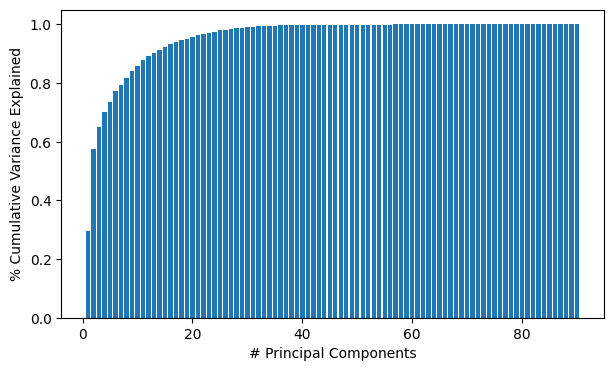

In [59]:
#visualize how many components actually explain how much of the variance in the set
cum_var = []
var_exp = 0
for i in pca_ev.explained_variance_ratio_:
    var_exp += i
    cum_var.append(var_exp)
    
fig, ax = plt.subplots(figsize=(7,4))
ax.bar(range(1,91), cum_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');

In [60]:
for i in range(30):
    
    pca_30_ev = ev_pca[:,0:i+1]

#### THE STANDARD SCALED PCA VERSION OF THE EVALUATION SET

In [61]:
# scaling the evaluation set
ev_sd = scaler1.fit_transform(eval)
ev_sd

array([[-3.11479206e-01,  1.33247045e-02, -4.25822105e-01, ...,
        -2.14678666e+00, -1.60665031e+00, -5.04246886e-01],
       [ 4.94414586e-01,  3.02498456e-02,  1.45652704e+00, ...,
         4.62076455e-01,  2.06800146e+00,  3.60318790e-01],
       [-7.60902691e-01, -5.20065671e-03, -6.93268010e-01, ...,
         9.23077237e-01, -4.92391837e-01, -3.21107415e-01],
       ...,
       [-8.29220141e-01,  2.93593261e-03, -6.58347911e-01, ...,
        -9.93372470e-01, -1.51952165e+00, -1.13316990e+00],
       [-7.89051796e-01, -1.63396295e-03, -2.05792457e-01, ...,
         8.33287508e-01, -6.06962031e-01,  1.65314287e+00],
       [ 9.13544252e-02,  3.07271141e-02,  2.22623074e+00, ...,
         1.14848432e+00,  6.41433729e-01, -4.55740279e-01]])

In [62]:
#creating the PCA with all the 90 features to gain a wholistic understanding in the evaluation set: 
pca_ev_scaled1 = PCA(n_components=90)
pca_ev_scaled1.fit(ev_sd)
ev_pca_sd = pca_ev_scaled1.transform(ev_sd)

In [63]:
ev_pca_sd

array([[-1.89818198,  0.80459542, -1.54691865, ..., -0.01509596,
        -0.01109021,  0.07633397],
       [-1.5961831 , -3.07770269,  3.44260784, ...,  0.07235943,
         0.158015  ,  0.03554797],
       [ 4.6375096 ,  2.17148216,  1.63950375, ...,  0.03258544,
        -0.08844402, -0.03510958],
       ...,
       [ 0.09294781, -4.8959078 ,  1.91001655, ...,  0.02937714,
         0.02222339,  0.02357941],
       [ 4.17265051,  2.32878227,  0.94635878, ..., -0.01247821,
        -0.02557223,  0.01515158],
       [-1.21838147,  3.59885592,  0.11501876, ..., -0.20055004,
        -0.01276532,  0.04732001]])

In [64]:
for i in range(70):
    
    pca_70_ev = ev_pca_sd[:,0:i+1]

#### THE BEST OUTPUT IN LEADERBOARD:

In [65]:
eval_imp = eval[most_important_features_rf]
eval_imp.head()

,pmax[8],pmax[11],pmax[10],pmax[5],pmax[13],pmax[9],negpmax[13],negpmax[11],negpmax[3],negpmax[10],...,area[10],area[11],area[14],area[15],area[8],area[6],area[4],area[1],area[9],area[2]
0,4.062283,28.915939,21.683093,13.810622,61.340985,5.639908,-47.161761,-17.201431,-4.175235,-14.402112,...,10.736060,14.375482,8.623282,103.042194,3.005078,4.333748,13.883821,5.554105,3.856479,3.547230
1,4.791379,3.742776,4.520874,15.019028,23.587567,4.849396,-10.732013,-6.881121,-57.040155,-4.262129,...,6.397792,1.937633,6.507688,160.806049,3.176204,3.667720,4.384134,17.998419,3.991943,11.315171
2,97.682349,8.480679,39.527005,40.196329,12.934276,20.836282,-4.244329,-5.132541,-5.478476,-20.399692,...,20.058053,6.131667,3.488582,153.038339,49.086918,13.511074,4.730027,3.289124,13.048237,3.578799
3,5.041263,6.760588,9.139548,14.319162,43.858466,5.294766,-18.916254,-4.778204,-32.861496,-4.777567,...,7.160350,5.092703,9.713149,157.042438,2.757816,2.590944,6.235400,38.422989,5.919363,10.306552
4,23.921475,20.895435,92.394315,49.161887,54.800885,9.744598,-23.237872,-7.649243,-6.082755,-49.250583,...,44.170484,11.734297,7.130603,145.466171,13.542758,5.172855,4.964267,7.767408,6.172327,3.765579


In [66]:
predictions_best = rf.predict(eval_imp)
csv_from_evaluation(predictions_best)

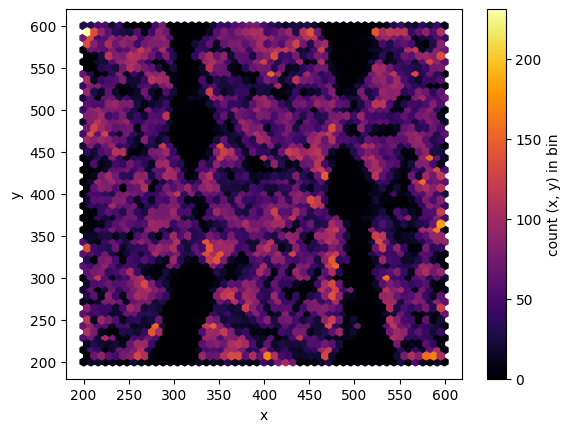

In [69]:
pred_data = pd.read_csv('output.csv')
pred_data[['x', 'y']] = pred_data['Predicted'].str.replace("'", "").str.split('|', expand=True)
pred_data[['x', 'y']] = pred_data[['x', 'y']].apply(pd.to_numeric)

# Hexbin plotof x and y variables
plt.hexbin(pred_data['x'], pred_data['y'], gridsize=50, cmap='inferno')
plt.colorbar(label='count (x, y) in bin')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('hexbin_eval.png', dpi=300)
plt.show()